In [ ]:
your_hf_key_to_read = ""
your_hf_key_to_write = ""
your_wandb_key = ""

"""
qwen3_vl_2b_r32_b8 / 멘토님
qwen3_vl_2b_r64_b16 / 지연님
qwen3_vl_2b_r64_b8 / 수영님
qwen3_vl_2b_abliterated_r32_b8 / 경만님
qwen3_vl_2b_abliterated_r64_b16 / 정수님
qwen3_vl_2b_abliterated_r64_b8 / 태영님
"""
exp_name = ""

"""
AIX-01/Qwen3-VL-2B-Instruct-unsloth-bnb-4bit-3000steps-r64-b16 / 지연님
AIX-01/Qwen3-VL-2B-Instruct-unsloth-bnb-4bit-3000steps-r64-b8 / 수영님
AIX-01/Huihui-Qwen3-VL-2B-Instruct-abliterated-3000steps-r64-b16 / 정수님
AIX-01/Huihui-Qwen3-VL-2B-Instruct-abliterated-3000steps-r64-b8 / 태영님
"""
model_repo_name = ""

"""
unsloth/Qwen3-VL-2B-Instruct-unsloth-bnb-4bit
huihui-ai/Huihui-Qwen3-VL-2B-Instruct-abliterated
"""
model_name = ""

"""
32 / 64
"""
rank = 
alpha = rank  # do not edit

"""
8 / 16
"""
batch_size = 


In [ ]:
import os

# ✅ /workspace 아래로 Hugging Face 전체 루트 이동
os.environ["HF_HOME"] = "/workspace/.cache/huggingface"

# ✅ Hub(모델/토크나이저/데이터셋 repo snapshot) 캐시 위치
os.environ["HF_HUB_CACHE"] = "/workspace/.cache/huggingface/hub"

# ✅ datasets 라이브러리 Arrow 캐시 위치
os.environ["HF_DATASETS_CACHE"] = "/workspace/.cache/huggingface/datasets"

# (선택) 전처리 산출물 등 assets 캐시
os.environ["HF_ASSETS_CACHE"] = "/workspace/.cache/huggingface/assets"

In [2]:
!pip install -q unsloth
!pip install -q transformers==4.57.1
!pip install -q --no-deps trl==0.22.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.8.0+cu128 requires torch==2.8.0, but you have torch 2.10.0 which is incompatible.


In [ ]:
# read 권한이 있는 키
!hf auth login --token {your_hf_key_to_read}

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `hf`CLI if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `AIX-01-AEGIS-PROJECT-DATASET` has been saved to /workspace/.cache/huggingface/stored_tokens
Your token has been saved to /workspace/.cache/huggingface/token
Login successful.
The current active token is: `AIX-01-AEGIS-PROJECT-DATASET`


In [4]:
from datasets import load_dataset

dataset_repo = "AIX-01/aegis-datasets-no-summary-original-only"
dataset = load_dataset(dataset_repo)

README.md:   0%|          | 0.00/432 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

data/train-00000-of-00020.parquet:   0%|          | 0.00/575M [00:00<?, ?B/s]

data/train-00001-of-00020.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

data/train-00002-of-00020.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

data/train-00003-of-00020.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

data/train-00004-of-00020.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

data/train-00005-of-00020.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

data/train-00006-of-00020.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

data/train-00007-of-00020.parquet:   0%|          | 0.00/582M [00:00<?, ?B/s]

data/train-00008-of-00020.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

data/train-00009-of-00020.parquet:   0%|          | 0.00/408M [00:00<?, ?B/s]

data/train-00010-of-00020.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

data/train-00011-of-00020.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

data/train-00012-of-00020.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

data/train-00013-of-00020.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

data/train-00014-of-00020.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

data/train-00015-of-00020.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

data/train-00016-of-00020.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

data/train-00017-of-00020.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

data/train-00018-of-00020.parquet:   0%|          | 0.00/602M [00:00<?, ?B/s]

data/train-00019-of-00020.parquet:   0%|          | 0.00/591M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3150 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_names', 'images', 'class1', 'class2', 'summary'],
        num_rows: 3150
    })
})

In [6]:
dataset["train"][0]["images"]

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>]

In [7]:
# 1) class1 / class2 고유값
u1 = set(dataset["train"].unique("class1"))
u2 = set(dataset["train"].unique("class2"))

In [8]:
u1

{'abnormal', 'normal', 'suspicious'}

In [9]:
u2

{'assault', 'burglary', 'dump', 'swoon', 'vandalism'}

In [10]:
from datasets import DatasetDict

# 1) 셔플 + 2) 정확히 150개를 test로 분리
splits = dataset["train"].shuffle(seed=42).train_test_split(test_size=150, seed=42)

# 3) train/test DatasetDict로 정리
ds_split = DatasetDict({
    "train": splits["train"],  # 3000
    "test": splits["test"],    # 150
})

In [13]:
ds_split

DatasetDict({
    train: Dataset({
        features: ['image_names', 'images', 'class1', 'class2', 'summary'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['image_names', 'images', 'class1', 'class2', 'summary'],
        num_rows: 150
    })
})

In [14]:
"""
class1, class2 가능한 값 카운트하는 코드 추가
"""
from collections import Counter

# class1, class2 가능한 값
class1_labels = ["abnormal", "normal", "suspicious"]
class2_labels = ["assault", "burglary", "dump", "swoon", "vandalism"]

def print_label_counts(ds_split):
    for split_name in ["train", "test"]:
        ds = ds_split[split_name]

        # class1 / class2 전체 카운트
        c1_counts = Counter(ds["class1"])
        c2_counts = Counter(ds["class2"])

        print(f"===== {split_name} =====")
        print("[class1]")
        for lbl in class1_labels:
            print(f"  {lbl}: {c1_counts.get(lbl, 0)}")

        print("[class2]")
        for lbl in class2_labels:
            print(f"  {lbl}: {c2_counts.get(lbl, 0)}")
        print()

# 사용 예시
print_label_counts(ds_split)

===== train =====
[class1]
  abnormal: 998
  normal: 999
  suspicious: 1003
[class2]
  assault: 606
  burglary: 594
  dump: 600
  swoon: 602
  vandalism: 598

===== test =====
[class1]
  abnormal: 52
  normal: 51
  suspicious: 47
[class2]
  assault: 24
  burglary: 36
  dump: 30
  swoon: 28
  vandalism: 32



In [15]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
model, tokenizer = FastVisionModel.from_pretrained(
    model_name,
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

==((====))==  Unsloth 2026.1.4: Fast Qwen3_Vl patching. Transformers: 4.57.1.
   \\   /|    NVIDIA RTX A4000. Num GPUs = 1. Max memory: 15.724 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.10.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.6.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.34. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.26G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = rank,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = alpha,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

In [27]:
"""
trainable_parameters 개수, 전체 대비 비율 출력 추가
"""
model.print_trainable_parameters()

trainable params: 47,448,064 || all params: 2,174,980,096 || trainable%: 2.1815


In [18]:
instruction = """You are a video incident classifier.

Input: frames at 1 FPS in chronological order. Predict what situation is occurring next.

Output exactly:
class1=<normal|suspicious|abnormal>
class2=<assault|burglary|dump|swoon|vandalism>

No extra text."""

In [19]:
def convert_to_conversation(sample, instruction, max_images=8):
    # images: list[PIL.Image] (최대 8개)
    imgs = sample.get("images", [])
    imgs = imgs[:max_images]

    user_content = [{"type": "text", "text": instruction}]
    # 프레임을 1 FPS 순서대로 제공 (이미 정렬돼 있다면 그대로)
    for img in imgs:
        user_content.append({"type": "image", "image": img})

    # 간결한 정답 포맷 (학습용 고정)
    answer = f"class1={sample['class1']}\nclass2={sample['class2']}"

    conversation = [
        {"role": "user", "content": user_content},
        {"role": "assistant", "content": [{"type": "text", "text": answer}]},
    ]
    return {"messages": conversation}

In [20]:
converted_dataset = [convert_to_conversation(sample, instruction) for sample in ds_split["train"]]

In [21]:
converted_test_dataset = [convert_to_conversation(sample, instruction) for sample in ds_split["test"]]

In [22]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are a video incident classifier.\n\nInput: frames at 1 FPS in chronological order. Predict what situation is occurring next.\n\nOutput exactly:\nclass1=<normal|suspicious|abnormal>\nclass2=<assault|burglary|dump|swoon|vandalism>\n\nNo extra text.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile 

In [23]:
!pip install -q wandb weave

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.8.0+cu128 requires torch==2.8.0, but you have torch 2.10.0 which is incompatible.


In [ ]:
import os
os.environ['WANDB_API_KEY'] = your_wandb_key

In [25]:
import wandb
wandb.login()

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from WANDB_API_KEY.
wandb: Currently logged in as: bgmbgm94 (bgmbgm94-aix-01) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# # Wandb official example
# # Start a new wandb run to track this script.
# run = wandb.init(
#     # Set the wandb entity where your project will be logged (generally your team name).
#     entity="bgmbgm94-aix-01",
#     # Set the wandb project where this run will be logged.
#     project="my-awesome-project",
#     # Track hyperparameters and run metadata.
#     config={
#         "learning_rate": 0.02,
#         "architecture": "CNN",
#         "dataset": "CIFAR-100",
#         "epochs": 10,
#     },
# )

# # 멘토님 세팅
# wandb.init(
#     project="cctv_ai_system",     # 필수
#     name="qwen3_vl_2b_r32_b8",        # 선택
#     config={
#         "learning_rate": 5e-5,
#         "rank": 32,
#         "batch_size": 8
#     }
# )

# 실제 사용 세팅
wandb.init(
    entity="bgmbgm94-aix-01",
    project="aegis_cctv_ai_system",     # 필수
    name=exp_name,        # 선택
    config={
        "learning_rate": 5e-5,
        "lora_rank": rank,
        "lora_alpha": alpha,
        "batch_size": batch_size,
        "dataset": "AIX-01/aegis-datasets-no-summary-original-only"
    }
)


wandb: Detected [huggingface_hub.inference] in use.
wandb: Use W&B Weave for improved LLM call tracing. Weave is installed but not imported. Add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


In [ ]:
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    eval_dataset = converted_test_dataset[:64],
    args = SFTConfig(
        per_device_train_batch_size = batch_size,
        gradient_accumulation_steps = 1,
        eval_strategy ="steps",
        eval_on_start=True,
        eval_steps=50,
        warmup_steps = 5,
        max_steps = 3000,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 5e-5,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        lr_scheduler_type = "cosine",
        seed = 3407,
        output_dir = "outputs",
        report_to = "wandb",     # For Weights and Biases
        save_total_limit = 3,
        max_grad_norm=5.0,
        save_steps=500,
        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
    ),
)

Unsloth: Model does not have a default image size - using 512


In [29]:
# UnslothSFTTrainer.py의 create_model_card 함수가 있는 모듈 글로벌에 wandb를 꽂아줌
trainer.create_model_card.__func__.__globals__["wandb"] = wandb

In [30]:
trainer.train()

The model is already on multiple devices. Skipping the move to device specified in `args`.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 3,000 | Num Epochs = 8 | Total steps = 3,000
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 1 x 1) = 8
 "-____-"     Trainable parameters = 47,448,064 of 2,174,980,096 (2.18% trained)


Step,Training Loss,Validation Loss
0,No log,4.566213
50,0.038200,0.037191
100,0.020300,0.024910
150,0.026900,0.022516
200,0.017300,0.021085
250,0.015600,0.018322
300,0.013200,0.020074
350,0.018100,0.016781
400,0.014500,0.015577
450,0.009700,0.019184


Unsloth: Will smartly offload gradients to save VRAM!


KeyboardInterrupt: 

In [1]:
import os

# ✅ /workspace 아래로 Hugging Face 전체 루트 이동
os.environ["HF_HOME"] = "/workspace/.cache/huggingface"

# ✅ Hub(모델/토크나이저/데이터셋 repo snapshot) 캐시 위치
os.environ["HF_HUB_CACHE"] = "/workspace/.cache/huggingface/hub"

# ✅ datasets 라이브러리 Arrow 캐시 위치
os.environ["HF_DATASETS_CACHE"] = "/workspace/.cache/huggingface/datasets"

# (선택) 전처리 산출물 등 assets 캐시
os.environ["HF_ASSETS_CACHE"] = "/workspace/.cache/huggingface/assets"

In [ ]:
# write 권한이 있는 키
!hf auth login --token {your_hf_key_to_write}

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `hf`CLI if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `AIX-01-AEGIS-PROJECT-DATASET` has been saved to /workspace/.cache/huggingface/stored_tokens
Your token has been saved to /workspace/.cache/huggingface/token
Login successful.
The current active token is: `AIX-01-AEGIS-PROJECT-DATASET`


In [ ]:
model.push_to_hub(model_repo_name)
tokenizer.push_to_hub(model_repo_name)

In [ ]:
"""
checkpoint 업로드 추가(optional)
"""
from huggingface_hub import HfApi, create_repo


checkpoint_repo_id_2 = model_repo_name + "-checkpoint-2000"
checkpoint_repo_id_3 = model_repo_name + "-checkpoint-2500"

# 1) 리포지토리 생성 (없으면)
create_repo(checkpoint_repo_id_2, private=True)
create_repo(checkpoint_repo_id_3, private=True)

api = HfApi()
api.upload_folder(
    folder_path="./outputs/checkpoint-2000",  # 여기에 있는 파일 그대로 업로드
    repo_id=checkpoint_repo_id_2,
    repo_type="model",
)
api.upload_folder(
    folder_path="./outputs/checkpoint-2500",  # 여기에 있는 파일 그대로 업로드
    repo_id=checkpoint_repo_id_3,
    repo_type="model",
)


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

CommitInfo(commit_url='https://huggingface.co/AIX-01/Huihui-Qwen3-VL-2B-Instruct-abliterated-cctv-lora-checkpoint-2500/commit/7931512b0ce31033b4536d795f577d242f1665be', commit_message='Upload folder using huggingface_hub', commit_description='', oid='7931512b0ce31033b4536d795f577d242f1665be', pr_url=None, repo_url=RepoUrl('https://huggingface.co/AIX-01/Huihui-Qwen3-VL-2B-Instruct-abliterated-cctv-lora-checkpoint-2500', endpoint='https://huggingface.co', repo_type='model', repo_id='AIX-01/Huihui-Qwen3-VL-2B-Instruct-abliterated-cctv-lora-checkpoint-2500'), pr_revision=None, pr_num=None)

In [3]:
!pip install -qU scikit-learn matplotlib seaborn

In [ ]:
import pickle
from pathlib import Path

def save_pickle(obj, path: str | Path, protocol: int = pickle.HIGHEST_PROTOCOL) -> None:
    path = Path(path)
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("wb") as f:
        pickle.dump(obj, f, protocol=protocol)

def load_pickle(path: str | Path):
    path = Path(path)
    with path.open("rb") as f:
        return pickle.load(f)

# 저장
save_pickle(converted_dataset, "/workspace/converted_train_dataset.pkl")
save_pickle(converted_test_dataset,  "/workspace/converted_test_dataset.pkl")

In [22]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are a video incident classifier.\n\nInput: frames at 1 FPS in chronological order. Predict what situation is occurring next.\n\nOutput exactly:\nclass1=<normal|suspicious|abnormal>\nclass2=<assault|burglary|dump|swoon|vandalism>\n\nNo extra text.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile 

In [23]:
converted_test_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are a video incident classifier.\n\nInput: frames at 1 FPS in chronological order. Predict what situation is occurring next.\n\nOutput exactly:\nclass1=<normal|suspicious|abnormal>\nclass2=<assault|burglary|dump|swoon|vandalism>\n\nNo extra text.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x360>},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile 

In [24]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [25]:
import re
import io
import base64
from typing import List, Tuple, Dict, Any

import pandas as pd
from PIL import Image
from tqdm.auto import tqdm

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
)

In [ ]:
model, tokenizer = FastVisionModel.from_pretrained(
    model_repo_name,
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

==((====))==  Unsloth 2026.1.4: Fast Qwen3_Vl patching. Transformers: 4.57.1.
   \\   /|    NVIDIA RTX A4000. Num GPUs = 1. Max memory: 15.724 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.10.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.6.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.34. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.26G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/190M [00:00<?, ?B/s]

In [27]:
import torch
from transformers import pipeline
from tqdm.auto import tqdm

In [28]:
FastVisionModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen3VLForConditionalGeneration(
      (model): Qwen3VLModel(
        (visual): Qwen3VLVisionModel(
          (patch_embed): Qwen3VLVisionPatchEmbed(
            (proj): Conv3d(3, 1024, kernel_size=(2, 16, 16), stride=(2, 16, 16))
          )
          (pos_embed): Embedding(2304, 1024)
          (rotary_pos_emb): Qwen3VLVisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-23): 24 x Qwen3VLVisionBlock(
              (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (attn): Qwen3VLVisionAttention(
                (qkv): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=1024, out_features=3072, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Identity()
                  )
                  (lora_A): ModuleDict(
                    (default): Li

In [29]:
pred_texts = []  # 모델 응답(원문)
true_texts = []  # GT 라벨(원문) = sample["messages"][1] 텍스트

In [30]:
for sample in tqdm(converted_test_dataset):
    user_msg = sample["messages"][0]
    asst_msg = sample["messages"][1]

    # GT 원문 저장
    true_texts.append("".join(c.get("text","") for c in asst_msg["content"] if c.get("type") == "text"))

    images = [c["image"] for c in user_msg["content"] if c.get("type") == "image"]

    prompt = tokenizer.apply_chat_template([user_msg], tokenize=False, add_generation_prompt=True)
    inputs = tokenizer(text=prompt, images=images, return_tensors="pt")

    # (모델이 accelerate로 올라가 있으면 inputs를 굳이 .to(device) 안 해도 되는 경우가 많음)
    # 안전하게 텐서만 cuda로 보내고 싶으면 아래 한 줄을 쓰되, device는 model 첫 파라미터 기준으로.
    dev = next(model.parameters()).device
    inputs = {k: (v.to(dev) if torch.is_tensor(v) else v) for k, v in inputs.items()}

    with torch.inference_mode():
        out = model.generate(**inputs, max_new_tokens=32, do_sample=False, temperature=0.0)

    # ✅ 출력 토큰만 디코딩 (pipeline의 return_full_text=False랑 동일 효과)
    gen_ids = out[0, inputs["input_ids"].shape[-1]:]
    pred_texts.append(tokenizer.decode(gen_ids, skip_special_tokens=True).strip())

print(pred_texts[0])
print(true_texts[0])


  0%|          | 0/150 [00:00<?, ?it/s]

class1=normal
class2=burglary
class1=normal
class2=burglary


In [31]:
pred_texts[:10]

['class1=normal\nclass2=burglary',
 'class1=normal\nclass2=vandalism',
 'class1=abnormal\nclass2=dump',
 'class1=abnormal\nclass2=vandalism',
 'class1=abnormal\nclass2=swoon',
 'class1=abnormal\nclass2=burglary',
 'class1=suspicious\nclass2=burglary',
 'class1=abnormal\nclass2=burglary',
 'class1=suspicious\nclass2=assault',
 'class1=normal\nclass2=vandalism']

In [32]:
true_texts[:10]

['class1=normal\nclass2=burglary',
 'class1=suspicious\nclass2=vandalism',
 'class1=suspicious\nclass2=dump',
 'class1=abnormal\nclass2=vandalism',
 'class1=abnormal\nclass2=swoon',
 'class1=abnormal\nclass2=burglary',
 'class1=suspicious\nclass2=burglary',
 'class1=abnormal\nclass2=burglary',
 'class1=suspicious\nclass2=assault',
 'class1=normal\nclass2=swoon']

In [33]:
import re
import torch
from tqdm.auto import tqdm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, pred_labels, labels=None, normalize=True):
    norm_option = 'true' if normalize else None
    cm = confusion_matrix(true_labels, pred_labels, labels=labels, normalize=norm_option)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues',
                xticklabels=labels if labels else "auto",
                yticklabels=labels if labels else "auto")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
    plt.tight_layout()
    plt.show()

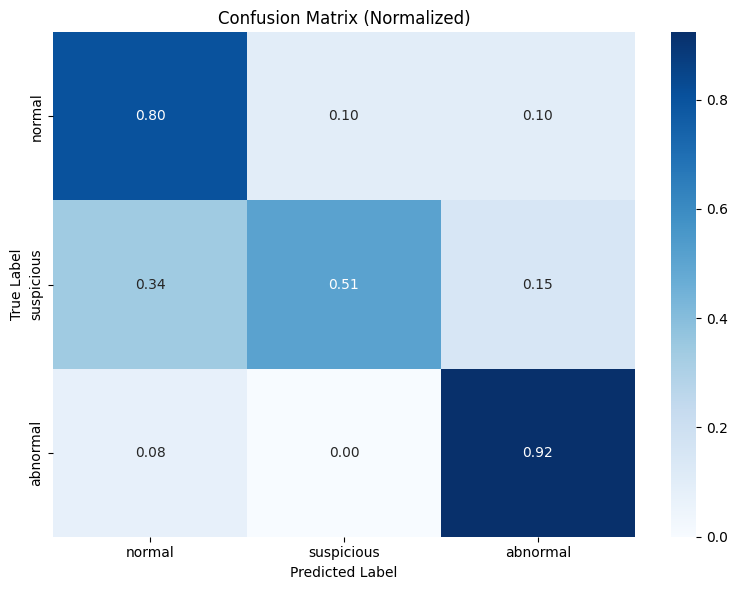

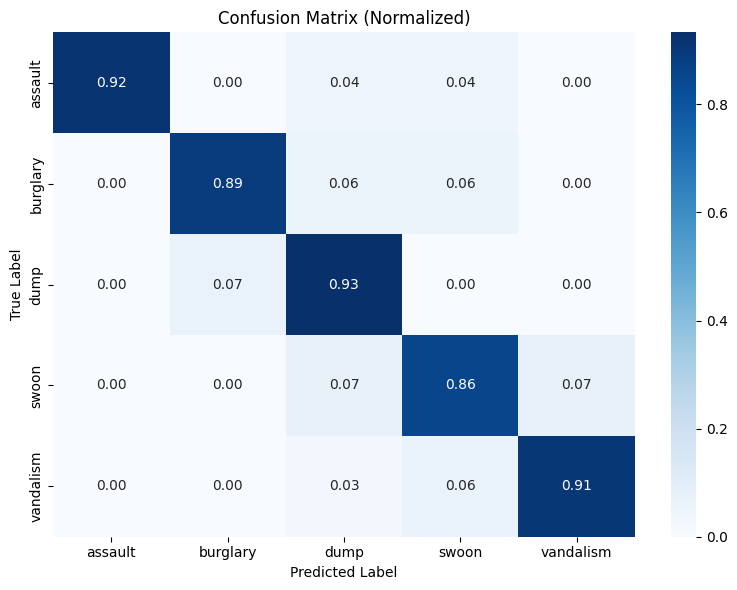

In [34]:
import re

# labels
CLASS1 = ["normal", "suspicious", "abnormal"]
CLASS2 = ["assault", "burglary", "dump", "swoon", "vandalism"]
UNK = "unknown"

def parse_c1c2(s: str):
    s = (s or "").lower()
    m1 = re.search(r"class1\s*=\s*(normal|suspicious|abnormal)", s)
    m2 = re.search(r"class2\s*=\s*(assault|burglary|dump|swoon|vandalism)", s)
    c1 = m1.group(1) if m1 else UNK
    c2 = m2.group(1) if m2 else UNK
    return c1, c2

def parse_lists(texts):
    c1_list, c2_list = [], []
    for t in texts:
        c1, c2 = parse_c1c2(t)
        c1_list.append(c1)
        c2_list.append(c2)
    return c1_list, c2_list

# 예: pred_texts / true_texts 둘 다 같은 방식으로 파싱
pred_c1, pred_c2 = parse_lists(pred_texts)
true_c1, true_c2 = parse_lists(true_texts)

# unknown 포함 여부 반영해서 labels 구성
labels1 = CLASS1 + ([UNK] if (UNK in set(pred_c1) or UNK in set(true_c1)) else [])
labels2 = CLASS2 + ([UNK] if (UNK in set(pred_c2) or UNK in set(true_c2)) else [])

# confusion matrix 그리기 (너가 준 함수 그대로 사용)
plot_confusion_matrix(true_c1, pred_c1, labels=labels1, normalize=True)  # class1
plot_confusion_matrix(true_c2, pred_c2, labels=labels2, normalize=True)  # class2

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ===== class1 metrics =====
acc1  = accuracy_score(true_c1, pred_c1)
prec1 = precision_score(true_c1, pred_c1, average="macro", labels=CLASS1, zero_division=0)
rec1  = recall_score(true_c1, pred_c1, average="macro", labels=CLASS1, zero_division=0)
f11   = f1_score(true_c1, pred_c1, average="macro", labels=CLASS1, zero_division=0)
report1 = classification_report(true_c1, pred_c1, labels=CLASS1, output_dict=True, zero_division=0)

print("=== class1 ===")
print("acc :", acc1)
print("prec:", prec1)
print("rec :", rec1)
print("f1  :", f11)

# ===== class2 metrics =====
acc2  = accuracy_score(true_c2, pred_c2)
prec2 = precision_score(true_c2, pred_c2, average="macro", labels=CLASS2, zero_division=0)
rec2  = recall_score(true_c2, pred_c2, average="macro", labels=CLASS2, zero_division=0)
f12   = f1_score(true_c2, pred_c2, average="macro", labels=CLASS2, zero_division=0)
report2 = classification_report(true_c2, pred_c2, labels=CLASS2, output_dict=True, zero_division=0)

print("\n=== class2 ===")
print("acc :", acc2)
print("prec:", prec2)
print("rec :", rec2)
print("f1  :", f12)

=== class1 ===
acc : 0.7533333333333333
prec: 0.7665724514791785
rec : 0.7458789298589048
f1  : 0.7402882205513784

=== class2 ===
acc : 0.9
prec: 0.9055551920434469
rec : 0.9004563492063493
f1  : 0.901709527441793
